In [3]:
import pandas as pd
import numpy as np
from decimal import Decimal as Dec
import re

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

In [4]:

import pandas as pd
import numpy as np
import re


data = pd.ExcelFile('assets/Energy Indicators.xls')
    
# exclude the footer and header
Energy = pd.read_excel(data, 0 , skiprows=17, skipfooter= 38)
    
# select only the necessary columns, the first two columns are unneccessary  
Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    
# rename the dolumns 
# note that this code changes the name of the columns      
#Energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

print(Energy.columns)



Index(['Unnamed: 1', 'Petajoules', 'Gigajoules', '%'], dtype='object')


In [5]:
data = pd.ExcelFile('assets/Energy Indicators.xls')
    
# exclude the footer and header
Energy = pd.read_excel(data, 0 , skiprows=17, skipfooter= 38)
    
# select only the necessary columns, the first two columns are unneccessary  
Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    
# rename the dolumns      
Energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
# missing data (e.g. data with "...") make sure this is reflected as np.NaN values
Energy['Energy Supply'] = Energy['Energy Supply'].replace('...', np.nan)
    
# Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule)
Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    
# Rename the following list of countries (for use in later questions)    
Energy['Country'] = Energy['Country'].replace({'Republic of Korea':'South Korea',
                               'United States of America':'United States',
                               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                               'China, Hong Kong Special Administrative Region':'Hong Kong'})
# There are also several countries with parenthesis in their name, ex: 'Bolivia (Plurinational State of)' should be 'Bolivia' 
Energy['Country'] = Energy['Country'].replace(r' \(.*\)', '',regex=True)

Energy.to_excel('energy.xlsx')



In [6]:
# --------------------------------------------------------------------------------------------------------    
# load the GDP data from the file assets/world_bank.csv, it contains countries' GDP 
# from 1960 to 2015 from World Bank. Call this DataFrame GDP, skip the header 
GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    
# rename col name
GDP = GDP.rename(columns = {'Country Name': 'Country'})
    
# rename country names
GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})

# drop columns except
GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

GDP.to_excel('gdp.xlsx')   




In [7]:
# load the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions 
# in the aforementioned area. Call this DataFrame ScimEn.
ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
#choose only first 15 rows
ScimEn = ScimEn[:15]
ScimEn.to_excel('scimEn.xlsx') 

The next code is merging three dataframes - Energy, GDP, and ScimEn - into a single dataframe based on a common column - 'Country'.

The merging is performed using the inner join, which returns only the matching rows from all three dataframes based on the common column 'Country'.

First, the code merges the ScimEn and Energy dataframes on the 'Country' column using the inner join. The resulting dataframe contains only the rows where a country name is present in both dataframes.

Then, the code merges the resulting dataframe with the GDP dataframe using the inner join on the 'Country' column again. The resulting dataframe now contains only the rows where a country name is present in all three dataframes.

Finally, the resulting dataframe is set to have the 'Country' column as the index.


In [18]:
# merge by inner join
# merged = pd.merge(Energy, GDP, on='Country', how='inner').merge(ScimEn, on='Country', how='inner')
    
merge1 = pd.merge(ScimEn, Energy, how = 'inner', left_on='Country', right_on='Country')
merge2 = pd.merge(merge1, GDP, how = 'inner', left_on='Country', right_on='Country')
merge2= merge2.set_index('Country')

merge2.to_csv('merge2.csv')   

In [7]:
# import the packages
import pandas as pd
import numpy as np
import re

# load the data
def answer_one():
    data = pd.ExcelFile('assets/Energy Indicators.xls')
    
# exclude the footer and header
    Energy = pd.read_excel(data, 0 , skiprows=17, skipfooter= 38)
    
# select only the necessary columns, the first two columns are unneccessary  
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    
# rename the dolumns      
    Energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
# missing data (e.g. data with "...") make sure this is reflected as np.NaN values
    Energy['Energy Supply'] = Energy['Energy Supply'].replace('...', np.nan)
    
# Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    
# Rename the following list of countries (for use in later questions)    
    Energy['Country'] = Energy['Country'].replace({'Republic of Korea':'South Korea',
                               'United States of America':'United States',
                               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                               'China, Hong Kong Special Administrative Region':'Hong Kong'})
# There are also several countries with parenthesis in their name, ex: 'Bolivia (Plurinational State of)' should be 'Bolivia' 
    Energy['Country'] = Energy['Country'].replace(r' \(.*\)', '',regex=True)

# --------------------------------------------------------------------------------------------------------    
# load the GDP data from the file assets/world_bank.csv, it contains countries' GDP 
# from 1960 to 2015 from World Bank. Call this DataFrame GDP, skip the header 
    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    
# rename col name
    GDP = GDP.rename(columns = {'Country Name': 'Country'})
    
# rename country names
    GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})

# drop columns except
    GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    
# load the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions 
# in the aforementioned area. Call this DataFrame ScimEn.
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
#choose only first 15 rows
    ScimEn = ScimEn[:15]

# merge by inner join
# merged = pd.merge(Energy, GDP, on='Country', how='inner').merge(ScimEn, on='Country', how='inner')
    
    merge1 = pd.merge(ScimEn, Energy, how = 'inner', left_on='Country', right_on='Country')
    merge2 = pd.merge(merge1, GDP, how = 'inner', left_on='Country', right_on='Country')
    merge2= merge2.set_index('Country')

    return merge2


    #raise NotImplementedError()
    

In [13]:
#final answer 1

# import the packages
import pandas as pd
import numpy as np
import re

# load the data
def answer_one():
    data = pd.ExcelFile('assets/Energy Indicators.xls')
    
# exclude the footer and header
    Energy = pd.read_excel(data, 0 , skiprows=17, skipfooter= 38)
    
# select only the necessary columns, the first two columns are unneccessary  
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    
# rename the dolumns      
    Energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
# missing data (e.g. data with "...") make sure this is reflected as np.NaN values
    Energy['Energy Supply'] = Energy['Energy Supply'].replace('...', np.nan)
    
# Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    
# Rename the following list of countries (for use in later questions)    
    Energy['Country'] = Energy['Country'].replace({'Republic of Korea':'South Korea',
                               'United States of America':'United States',
                               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                               'China, Hong Kong Special Administrative Region':'Hong Kong'})
# There are also several countries with parenthesis in their name, ex: 'Bolivia (Plurinational State of)' should be 'Bolivia' 
    Energy['Country'] = Energy['Country'].replace(r' \(.*\)', '',regex=True)

# --------------------------------------------------------------------------------------------------------    
# load the GDP data from the file assets/world_bank.csv, it contains countries' GDP 
# from 1960 to 2015 from World Bank. Call this DataFrame GDP, skip the header 
    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    
# rename col name
    GDP = GDP.rename(columns = {'Country Name': 'Country'})
    
# rename country names
    GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})

# drop columns except
    GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    
# load the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions 
# in the aforementioned area. Call this DataFrame ScimEn.
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
#choose only first 15 rows
    ScimEn = ScimEn[:15]

# merge by inner join
# first join ScimEn, Energy    
    merge1 = pd.merge(ScimEn, Energy, how = 'inner', left_on='Country', right_on='Country')
# now join merge1 with GDP 
    merge2 = pd.merge(merge1, GDP, how = 'inner', left_on='Country', right_on='Country')
# The index of this DataFrame should be the name of the country
    merge2= merge2.set_index('Country')

    return merge2


    #raise NotImplementedError()
    

In [9]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [ ]:

# QUESTION 2
import pandas as pd
import numpy as np

def answer_two():
    data = pd.ExcelFile('assets/Energy Indicators.xls') 
    Energy = pd.read_excel(data, 0, skiprows = 17, skipfooter= 38)
    Energy = Energy[['Unnamed: 1', 'Petajoules', 'Gigajoules', '%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy['Energy Supply'].replace('...', np.nan, inplace = True)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'].replace({"Republic of Korea": "South Korea",
                            "United States of America": "United States",
                            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                            "China, Hong Kong Special Administrative Region": "Hong Kong"}, inplace = True)
    Energy['Country'].replace(r' \(.*\)', '', regex = True, inplace = True)

    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                                "Iran, Islamic Rep.": "Iran",
                                "Hong Kong SAR, China": "Hong Kong"}, inplace=True)

    GDP = GDP[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    GDP.rename(columns = {'Country Name': 'Country'}, inplace=True)

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')


    merge1 = pd.merge(ScimEn, Energy, how = 'inner', left_on='Country', right_on='Country')
    merge2 = pd.merge(merge1, GDP, how = 'inner', left_on='Country', right_on='Country')
    merge2 = merge2.set_index('Country')

    data_concat = pd.concat([ScimEn, Energy, GDP])['Country'].unique()
    return len(data_concat) - len(merge2)

    raise NotImplementedError()

In [9]:
def answer_two():
    # load the data
    data = pd.ExcelFile('assets/Energy Indicators.xls')
    Energy = pd.read_excel(data, 0, skiprows=17, skipfooter=38)
    Energy = Energy[['Unnamed: 1', 'Petajoules', 'Gigajoules', '%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy['Energy Supply'] = Energy['Energy Supply'].replace('...', np.nan)
    Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000
    Energy['Country'] = Energy['Country'].replace({'Republic of Korea': 'South Korea',
                                                   'United States of America': 'United States',
                                                   'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                                                   'China, Hong Kong Special Administrative Region': 'Hong Kong'})
    Energy['Country'] = Energy['Country'].replace(r' \(.*\)', '', regex=True)

    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP = GDP.rename(columns={'Country Name': 'Country'})
    GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                                             "Hong Kong SAR, China": "Hong Kong"})

    GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')

    # inner join
    merge1 = pd.merge(ScimEn, Energy, how='inner', left_on='Country', right_on='Country')
    merge2 = pd.merge(merge1, GDP, how='inner', left_on='Country', right_on='Country')
    num_entries_before = len(merge2)

    # outer join
    merge1 = pd.merge(ScimEn, Energy, how='outer', left_on='Country', right_on='Country')
    merge2 = pd.merge(merge1, GDP, how='outer', left_on='Country', right_on='Country')
    num_entries_after = len(merge2)

    return num_entries_after - num_entries_before


In [10]:
answer_two()

158

The next code uses iloc and loc that are indexing methods in pandas used to select rows and columns of a DataFrame.

iloc stands for "integer location" and is used to select rows and columns by their integer position in the DataFrame. It takes two integer arguments, the first being the row indices and the second being the column indices. For example, df.iloc[0:5, 0:3] would select the first 5 rows and the first 3 columns of the DataFrame df.

loc stands for "location" and is used to select rows and columns by their labels (either row labels or column labels). It takes two arguments, the first being the row labels and the second being the column labels. For example, df.loc[:, ['col1', 'col2']] would select all rows and only the columns labeled 'col1' and 'col2' in the DataFrame df.

Both iloc and loc can also be used to filter rows based on a condition. For example, df.loc[df['col1'] > 10, 'col2'] would select all rows where the value in 'col1' is greater than 10, and only the 'col2' column.

In [11]:
import pandas as pd
import numpy as np
def answer_three():
    # YOUR CODE HERE
    data = pd.ExcelFile('assets/Energy Indicators.xls')
    Energy = pd.read_excel(data, 0 , skiprows=17, skipfooter= 38)              
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
          
    Energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy['Energy Supply'].replace('...', np.nan, inplace=True)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'].replace({'Republic of Korea':'South Korea',
                               'United States of America':'United States',
                               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                               'China, Hong Kong Special Administrative Region':'Hong Kong'}, inplace=True)
    Energy['Country'].replace(r' \(.*\)', '',regex=True, inplace=True)

    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                                "Iran, Islamic Rep.": "Iran",
                                "Hong Kong SAR, China": "Hong Kong"}, inplace=True)

    GDP = GDP[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    GDP.rename(columns = {'Country Name': 'Country'}, inplace=True)
    
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn = ScimEn[:15]

    

    merge1 = pd.merge(ScimEn, Energy, how = 'inner', left_on='Country', right_on='Country')
    merge2 = pd.merge(merge1, GDP, how = 'inner', left_on='Country', right_on='Country')
    merge2 = merge2.set_index('Country')
    
    top = merge2.iloc[:,10:]
    avgGDP = top.mean(axis=1)
    return avgGDP.sort_values(ascending=False)

    #raise NotImplementedError()


answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [15]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [16]:
def answer_three():
    top15_df = answer_one().iloc[:, 10:].mean(axis=1)
    return top15_df.sort_values(ascending=False).rename('avgGDP')


answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [ ]:
def answer_three():
    top15_df = answer_one()
    top15_df = top15_df.iloc[:,10:]
    ## Calculate the average GDP over the last 10 years for each country
    avgGDP = top15_df.mean(axis=1)
    
    return avgGDP.sort_values(ascending=False)

In [17]:

top15_df = answer_one()
top15_df = top15_df.iloc[:,10:]
top15_df.to_excel('top15_df.xlsx')
    

In [20]:
def answer_four():
    # YOUR CODE HERE
    top10 = answer_three()
    top15 = answer_one()
    top15 = top15.iloc[:,10:]
    
    country = top10[top10 == top10[5]].index[0]
    
    # diff = GDP[2015] - GDP[2006]
    diff = top15.loc[country]['2015'] - top15.loc[country]['2006']
    return diff

answer_four()

246702696075.3999

In [21]:
def answer_six():
    Top15 = answer_one()
    avg_gdp = Top15.mean(axis=1).sort_values(ascending=False)
    sixth_country = avg_gdp.index[5]
    gdp_2006 = Top15.loc[sixth_country, '2006']
    gdp_2015 = Top15.loc[sixth_country, '2015']
    gdp_change = gdp_2015 - gdp_2006
    return gdp_change


answer_six()

246702696075.3999

In [26]:
Top15 = answer_one()
avg_gdp = Top15.mean(axis=1).sort_values(ascending=False)
sixth_country = avg_gdp.index[5]

print(avg_gdp)


Country
United States         7.686714e+12
China                 3.180664e+12
Japan                 2.772053e+12
Germany               1.747176e+12
France                1.341392e+12
United Kingdom        1.244349e+12
Brazil                1.095505e+12
Italy                 1.060414e+12
India                 8.863085e+11
Canada                8.308453e+11
Russian Federation    7.842652e+11
Spain                 7.092853e+11
Australia             5.822907e+11
South Korea           5.539076e+11
Iran                  2.108723e+11
dtype: float64


In [ ]:
gdp_2006 = Top15.loc[sixth_country, '2006']
gdp_2015 = Top15.loc[sixth_country, '2015']
print(Top15)

In [28]:
# What is the mean energy supply per capita?

def answer_five():
    top15=answer_one()
    top15 = top15['Energy Supply per Capita']
    avg_energy=top15.mean()
    return avg_energy

answer_five()

157.6

In [29]:
def answer_five():
    return answer_one()['Energy Supply per Capita'].mean()
answer_five()

157.6

In [30]:
# What country has the maximum % Renewable and what is the percentage?
# This function should return a tuple with the name of the country and the percentage.

def answer_six():
    
    top15=answer_one()
    top15=top15['% Renewable'].sort_values(ascending=False)

    return (top15.index[0],top15.iloc[0]) #  .idxmax() ,  .max()
    raise NotImplementedError()

answer_six()   

('Brazil', 69.64803)

In [32]:
def answer_six():
    # Get the row with the maximum % Renewable
    max_renewable_row = Top15.loc[Top15['% Renewable'].idxmax()]
    
    # Get the name of the country and the percentage
    country_name = max_renewable_row.name
    percentage = max_renewable_row['% Renewable']
    
    # Return the tuple
    return (country_name, percentage)

answer_six()  

('Brazil', 69.64803)

In [33]:
# Create a new column that is the ratio of Self-Citations to Total Citations. 
#What is the maximum value for this new column, and what country has the highest ratio?

# This function should return a tuple with the name of the country and the ratio.

def answer_seven():
    top15 = answer_one()
    top15['Ratio'] = top15['Self-citations']/top15['Citations']
    return (top15['Ratio'].idxmax(), top15['Ratio'].max())
    raise NotImplementedError()

In [34]:
# Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
# What is the third most populous country according to this estimate?

# This function should return the name of the country

def answer_eight():
    top15 = answer_one()
    top15['Population Estimate'] = top15['Energy Supply']/top15['Energy Supply per Capita']
    return top15['Population Estimate'].sort_values(ascending=False).index[2]
    raise NotImplementedError()

answer_eight()

'United States'

In [35]:
def answer_eight():
    top15 = answer_one()
    top15['Population Estimate'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    third_most_populous = top15['Population Estimate'].sort_values(ascending=False).iloc[2]
    return top15[top15['Population Estimate'] == third_most_populous].index[0]

answer_eight()


'United States'

Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

(Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)

In [36]:
def answer_nine():
    top15 = answer_one()
    top15['Population Estimate'] = top15['Energy Supply']/top15['Energy Supply per Capita']
    top15['Citable Documents per Capita'] = top15['Citable documents']/top15['Population Estimate']
    
    top15['Citable Documents per Capita'] = top15['Citable Documents per Capita'].astype(float)
    top15['Energy Supply per Capita'] = top15['Energy Supply per Capita'].astype(float)
    
    return top15['Citable Documents per Capita'].corr(top15['Energy Supply per Capita'])
    
    raise NotImplementedError()

answer_nine()

0.7940010435442946

In [37]:
def answer_nine():
    top15 = answer_one()
    top15['Population Estimate'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable Documents per Capita'] = top15['Citable documents'] / top15['Population Estimate']
    return top15['Citable Documents per Capita'].astype(float).corr(top15['Energy Supply per Capita'].astype(float))
answer_nine()

0.7940010435442946

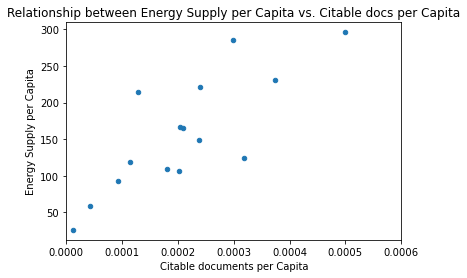

In [38]:
import matplotlib.pyplot as plt

def plot9():
    %matplotlib inline
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    plt.xlabel('Citable documents per Capita')
    plt.ylabel('Energy Supply per Capita')
    plt.title('Relationship between Energy Supply per Capita vs. Citable docs per Capita')
    plt.show()

plot9()


Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [ ]:
def answer_ten():   
    top15 = answer_one()
    top15['HighRenew'] = [1 if x >= top15['% Renewable'].median() else 0 for x in top15['% Renewable']]
    return top15['HighRenew']

In [ ]:
def answer_ten():
    top15 = answer_one()
    median_renewable = top15['% Renewable'].median()
    top15['HighRenew'] = top15['% Renewable'].apply(lambda x: 1 if x >= median_renewable else 0)
    return top15['HighRenew'].sort_index()


In [42]:
def answer_eleven():
    top15 = answer_one()
    
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    
    top15['Continent'] = top15.index.to_series().map(ContinentDict)
    
    top15['Population Estimate'] = (top15['Energy Supply']/top15['Energy Supply per Capita']).astype(float)
    
    result = top15.set_index('Continent').groupby(level = 0)['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    result.columns = ['size', 'sum', 'mean', 'std']
    
    return result


In [43]:
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [47]:
def answer_twelve():
    top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    top15 = top15.reset_index()
    top15['Continent'] = [ContinentDict[country] for country in top15['Country']]
    top15['% Renewable'] = pd.cut(top15['% Renewable'],5)
    top15=top15.groupby(['Continent','% Renewable']).size()
    return top15[top15>0] 
    raise NotImplementedError()

type(answer_twelve())

pandas.core.series.Series

In [44]:
def answer_thirteen():
    
    top15 = answer_one()
    
    top15['Population Estimate'] = (top15['Energy Supply']/top15['Energy Supply per Capita'])
    
    return top15['Population Estimate'].apply(lambda z: '{0:,}'.format(z)).astype(str)

    raise NotImplementedError()
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population Estimate, dtype: object